# Data anaylsis in cerebellar granular layer simulations
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.insert(1,'./src')

Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCGrC/SimulationConfigGranular.cfg'
simulation_time = 200.0
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Initialize the simulation

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['network']['load_file'] = './results/network01_after_all_learning.h5'
simulation.config_options['network']['save_file'] = None
simulation.initialize()

2016-06-14 15:10:31,003 - P23369 - Simulation - DEBUG: Simulation time fixed to 200.0s
2016-06-14 15:10:31,005 - P23369 - Simulation - DEBUG: Creating cerebellum generator
2016-06-14 15:10:31,084 - P23369 - Simulation - DEBUG: Initializing cerebellum generator
2016-06-14 15:10:31,085 - P23369 - Simulation - DEBUG: Cerebellar simulation initialized
2016-06-14 15:10:31,087 - P23369 - Simulation - DEBUG: NEST module loaded
2016-06-14 15:10:31,101 - P23369 - Simulation - DEBUG: Setting Global NEST Seed: 123469
2016-06-14 15:10:31,102 - P23369 - Simulation - DEBUG: Setting Per-Process NEST Seeds: [123470, 123471, 123472, 123473, 123474, 123475, 123476, 123477, 123478, 123479, 123480, 123481]
2016-06-14 15:10:31,126 - P23369 - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2016-06-14 15:10:31,127 - P23369 - Simulation - WARNING: Non-specified number of neurons in layer mflayer
2016-06-14 15:10:31,129 - P23369 - Simulation - WARNING: 

/opt/nest/nest2.10/nompi/lib/python2.7/site-packages/nest/lib/hl_api_helper.py:61: UserWarning: 
OneToOneConnect is deprecated and will be removed in a future version of NEST.
Please use Connect instead!
For details, see http://www.nest-simulator.org/connection_management                       


2016-06-14 15:10:33,810 - P23369 - Simulation - DEBUG: Nest Process: 0. Connections created in layer mfgrcsynapsis: 80034
2016-06-14 15:10:33,868 - P23369 - Simulation - DEBUG: Nest Process: 0. Connections created in layer mfgocsynapsis: 1888
2016-06-14 15:10:34,849 - P23369 - Simulation - DEBUG: Nest Process: 0. Connections created in layer grcgocsynapsis: 35886
2016-06-14 15:10:35,297 - P23369 - Simulation - DEBUG: Nest Process: 0. Connections created in layer gocgrcsynapsis: 16246
2016-06-14 15:10:35,300 - P23369 - Simulation - DEBUG: Nest Process: 0. Connections created in layer gocgocsynapsis: 81
2016-06-14 15:10:39,261 - P23369 - Simulation - DEBUG: Creating AC Current generator
2016-06-14 15:10:39,265 - P23369 - Simulation - DEBUG: Creating DC Current generator
2016-06-14 15:10:39,274 - P23369 - Simulation - INFO: Loading activation patterns from hdf5 file ./results/stimulation01.h5
2016-06-14 15:10:39,276 - P23369 - Simulation - DEBUG: Loading stimulation pattern 0
2016-06-14 1

Visualize the simulation or only run it.

In [4]:
#simulation.visualize_animation()
simulation.run_simulation()

2016-06-14 15:11:38,259 - P23369 - Simulation - INFO: Running the simulation from 0.0s until time 200.0s
2016-06-14 15:11:38,268 - P23369 - Simulation - DEBUG: Running the simulation 0.018s until 0.018s
2016-06-14 15:11:38,527 - P23369 - Simulation - DEBUG: Running the simulation 0.437s until 0.455s
2016-06-14 15:11:43,685 - P23369 - Simulation - DEBUG: Running the simulation 0.073s until 0.528s
2016-06-14 15:11:44,564 - P23369 - Simulation - DEBUG: Running the simulation 0.364s until 0.892s
2016-06-14 15:11:48,646 - P23369 - Simulation - DEBUG: Running the simulation 0.177s until 1.069s
2016-06-14 15:11:51,966 - P23369 - Simulation - DEBUG: Running the simulation 0.035s until 1.104s
2016-06-14 15:11:52,401 - P23369 - Simulation - DEBUG: Running the simulation 0.157s until 1.261s
2016-06-14 15:11:54,271 - P23369 - Simulation - DEBUG: Running the simulation 0.86s until 2.121s
2016-06-14 15:12:05,710 - P23369 - Simulation - DEBUG: Running the simulation 0.163s until 2.284s
2016-06-14 15:

Calculate the average firing frequency of each granular cells during the ending 100 seconds

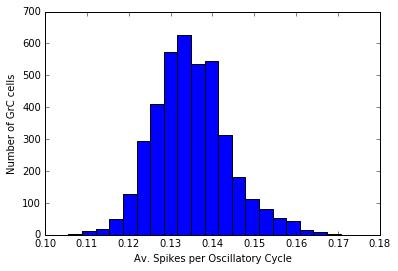

In [5]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = simulation.current_time-200.0, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Get the histogram of input synapses for the granular cells

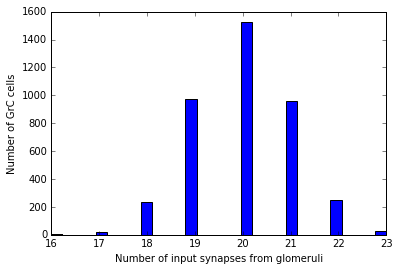

In [6]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
cell_number = simulation.cerebellum.layer_map['grclayer'].number_of_neurons
number_of_inputs = numpy.bincount(target_cell_index)
plt.hist(number_of_inputs, bins=30)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of input synapses from glomeruli')


Plot the histogram of non-zero weights between MF and GrC

Number of active synapses MF-GrC: 15951


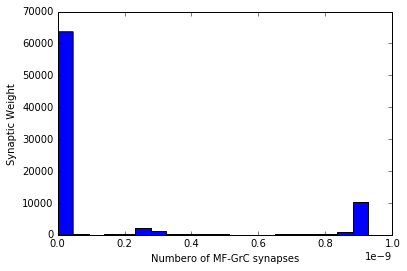

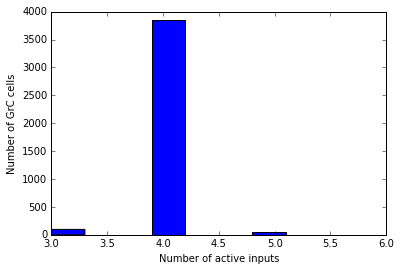

In [7]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Synaptic Weight')
plt.xlabel('Numbero of MF-GrC synapses')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GrC synapses also included in pattern 0 : 3903
Number of active MF-GrC synapses also included in pattern 1 : 3705
Number of active MF-GrC synapses also included in pattern 2 : 3870
Number of active MF-GrC synapses also included in pattern 3 : 3846


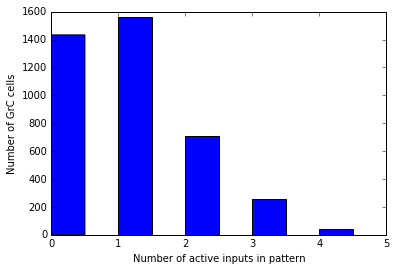

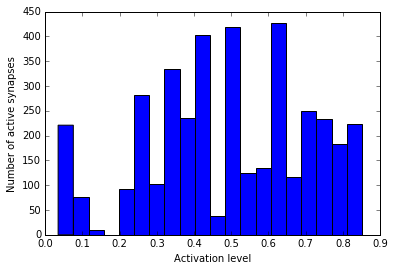

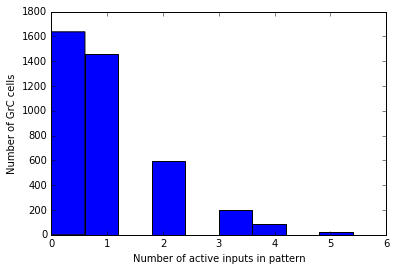

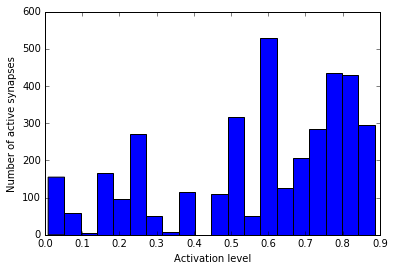

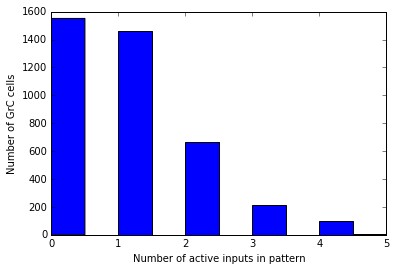

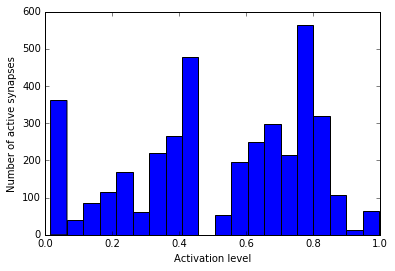

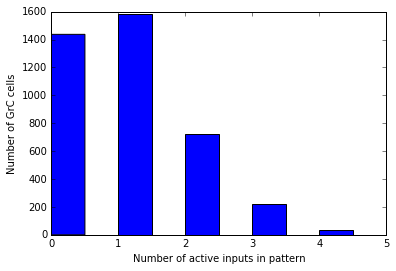

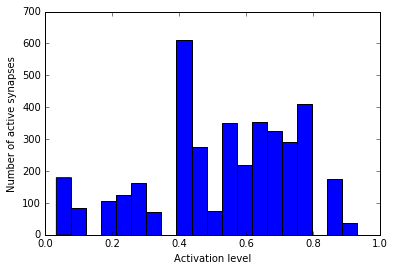

In [8]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active])
    plt.figure()
    plt.hist(number_of_active_inputs_in_pattern, bins=10)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

Represent the hit rate matrix of each GrC to each pattern

In [9]:
layer = simulation.config_options['mutual_information']['layer'] = 'grclayer'
window_length = simulation.config_options['mutual_information']['window_length'] = 200.0
time_bin = simulation.config_options['mutual_information']['time_bin'] = 0.125

cell_index = range(simulation.cerebellum.get_number_of_elements(layer=simulation.config_options['mutual_information']['layer']))
pattern_generator = simulation.pattern_generator
inv_time_bin = 1./time_bin

# Generate the time bin matrix
total_time = pattern_generator.simulation_time
bin_time_init = numpy.linspace(0.0, window_length-time_bin, num=window_length*inv_time_bin)
bin_time_end = numpy.linspace(time_bin,window_length,num=window_length*inv_time_bin)
        
# Initialize a matrix
pattern_index = range(0,pattern_generator.number_of_patterns)
num_patterns = len(pattern_index)
num_bins = len(bin_time_init)
num_cells = len(cell_index)
        
# Calculate the time of each pattern interval
time_end_of_pattern = pattern_generator.pattern_length_cum
time_init_of_pattern = numpy.append([0.0],time_end_of_pattern[:-1])
        
# Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
bin_end_of_pattern = numpy.floor(time_end_of_pattern * inv_time_bin).astype(int)
if (bin_end_of_pattern[-1]>=num_bins):
    bin_end_of_pattern[-1]=num_bins-1
bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
if (bin_init_of_pattern[-1]>=num_bins):
    bin_init_of_pattern[-1]=num_bins-1
        
# Final matrix indicating which bins are considered of each pattern
bin_is_pattern = numpy.empty((num_patterns, num_bins),dtype='bool')
bin_is_pattern[:,:] = False
bin_pattern = numpy.zeros(num_bins)
        
# Final matrix indicating which bins are registered spikes
bin_has_fired = numpy.empty((num_cells, num_bins), dtype='bool')
bin_has_fired[:,:] = False
        
for key, value in enumerate(pattern_index):
    time_of_pattern_in_bin = numpy.zeros(num_bins)
    for index in pattern_generator.pattern_id_index[value]:
        init_bin = bin_init_of_pattern[index]
        end_bin = bin_end_of_pattern[index]
            
        list_of_bins = range(init_bin,end_bin+1)
            
        # Add the time of the initial bin (if exists)
        if init_bin!=end_bin:
            time_of_pattern_in_bin[list_of_bins[0]] += (bin_time_end[init_bin] - time_init_of_pattern[index])
            
        # Add the time of the intermediate bins (if exist)
        time_of_pattern_in_bin[list_of_bins[1:-1]] += time_bin

        # Add the time of the final bin
        time_of_pattern_in_bin[list_of_bins[-1]] += (time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

    # Those bins where the time in the pattern is longer than half of the bin are set to part of that pattern    
    bin_is_pattern[key,time_of_pattern_in_bin>(time_bin/2.)] = True
    bin_pattern[bin_is_pattern[key,:]] = bin_pattern[bin_is_pattern[key,:]] + 2**value
    
# Create a map of cells to index
cell_map = dict()
for key, value in enumerate(cell_index):
    cell_map[value] = key

# Load data from the data provider
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = layer, init_time = 0.0, end_time = window_length)
        
        
spike_bin_index = numpy.floor(gtime*inv_time_bin).astype(int)
        
av_firing_rate = float(len(gtime))/(len(cell_index)*(window_length))
print 'Average firing rate in MI analysis:',av_firing_rate,'Hz'
        
cell_index = numpy.array([cell_map[value] for value in gcell_id])
        
# Final matrix indicating which bins are registered spikes
if len(spike_bin_index) and len(cell_index):
    bin_has_fired[cell_index,spike_bin_index] = True
        
# Calculate mutual information in the time window
init_bin = int(0 * inv_time_bin)
end_bin = int(window_length * inv_time_bin)
        
    
def calc_Ind_Pattern_Hit_Matrix(cell_firing, pattern_present):
    '''
    Calculate the correct rejection, hit, miss and false alarm matrisses with 1 line for each cell and 1 column for each pattern (including noise).
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    faa_matrix = numpy.empty((len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(numpy.count_nonzero(pattern))
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(numpy.count_nonzero(~pattern))
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(numpy.count_nonzero(pattern))
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(numpy.count_nonzero(~pattern))
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'
               
    any_pattern = numpy.any(pattern_present, axis=0)
    for index_cell, firing in enumerate(cell_firing):
        faa_matrix[index_cell] = numpy.count_nonzero(firing&~any_pattern)/float(numpy.count_nonzero(~any_pattern))
        
    return cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix

# Calculate hit matrix for each pattern
cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix = calc_Ind_Pattern_Hit_Matrix(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

numpy.set_printoptions(threshold=numpy.nan)
print 'Individual pattern hit matrix:'
print hit_matrix
print 'Individual pattern correct rejection matrix:'
print cr_matrix
print 'Individual pattern miss matrix:'
print miss_matrix
print 'Individual pattern false alarm matrix:'
print fa_matrix
print 'All patterns false alarm array:'
print faa_matrix

Average firing rate in MI analysis: 1.078805 Hz
Individual pattern hit matrix:
[[ 0.10628019  0.05072464  0.12077295  0.07729469  0.0942029   0.147343
   0.29227053  0.28743961  0.38888889  0.12077295  0.27536232  0.05797101
   0.12318841  0.13285024  0.12318841  0.11111111  0.22463768  0.11111111
   0.11835749  0.21980676  0.11352657  0.15942029  0.2294686   0.07004831
   0.06038647  0.10386473  0.12560386  0.12801932  0.147343    0.17874396
   0.12077295  0.41304348  0.1763285   0.0531401   0.16425121  0.18357488
   0.31400966  0.42753623  0.14251208  0.14009662  0.07729469  0.08695652
   0.16908213  0.13285024  0.12318841  0.12318841  0.10144928  0.09178744
   0.29710145  0.19323671  0.18357488  0.11594203  0.09178744  0.11111111
   0.4589372   0.14492754  0.09661836  0.13285024  0.11835749  0.11594203
   0.05797101  0.12560386  0.147343    0.07971014  0.07729469  0.08695652
   0.16425121  0.09661836  0.09903382  0.11594203  0.11352657  0.16425121
   0.12077295  0.38647343  0.137681

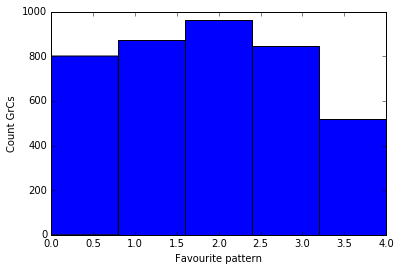

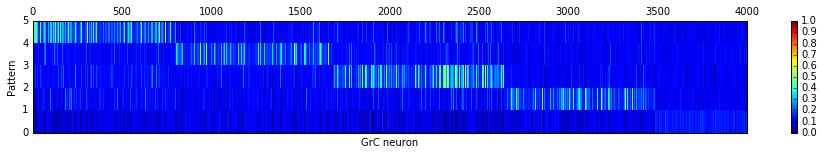

In [11]:
extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)
plt.figure()
plt.hist(selected_pattern, bins=simulation.pattern_generator.number_of_patterns+1)
plt.ylabel('Count GrCs')
plt.xlabel('Favourite pattern')
cell_sorted = numpy.argsort(selected_pattern)
plt.figure()
plt.matshow(extended_hit[:,cell_sorted], extent=[0,num_cells,0,num_patterns+1], vmin=0, vmax=1.0, aspect='auto')
plt.ylabel('Pattern')
plt.xlabel('GrC neuron')
plt.colorbar()


Histogram of active synapses GrC-PC

Number of active synapses GrC-PC: 0


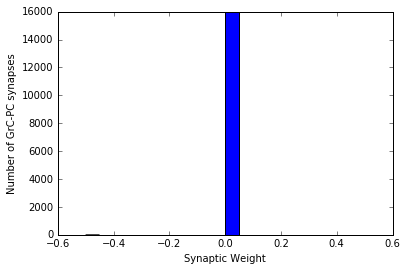

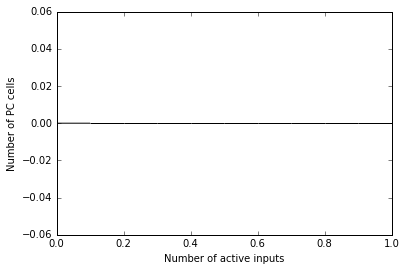

In [9]:
target_cell_index = simulation.cerebellum.layer_map['grcpcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcpcsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcpcsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Number of GrC-PC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of PC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-PC:',numpy.count_nonzero(active_synapses)